In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spe
from matplotlib import  font_manager


(-0.3, 0.3)

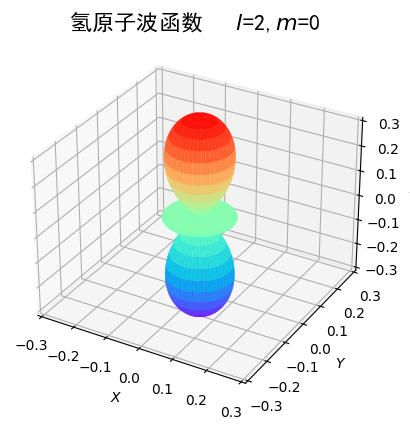

In [2]:
a_0 = 5.291772e-11
my_font=font_manager.FontProperties(fname='C:\Windows\Fonts\simhei.ttf')
def sph2cart(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return np.array([x, y, z])

theta = np.linspace(0, np.pi, 1000)
phi=np.linspace(0, 2*np.pi, 2000)

thetaa, phii = np.meshgrid(theta, phi)
l = 2
m = 0

Y=spe.sph_harm(m,l, phii,thetaa)
Y_real2 = Y.real**2
#psi = 1/np.sqrt(np.pi)*(1/a_0)**1.5*np.exp(-R/a_0)
X, Y, Z = sph2cart(Y_real2, thetaa, phii)
fg = plt.figure()
ax = fg.add_subplot(projection='3d')
ax.set_title(f'氢原子波函数   $l$={l},$m$={m}',fontproperties=my_font,fontsize=16)
ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('rainbow'))

#ax.contourf(X, Y, Z,zdir='z',offset=-2,cmap='rainbow')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
ax.set_zlim(-0.3,0.3)
ax.set_xlim(-0.3,0.3)
ax.set_ylim(-0.3,0.3)

In [3]:

from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import  font_manager
import seaborn as sns
plt.rcParams['font.family']=['SimHei']#设置字体为harmony 
plt.rcParams['axes.unicode_minus']=False#设置正常显示

f = pd.read_excel(r'D:\实验及上课文件\化工原理实验\离心泵特征曲线.xlsx',header=1)
f1 = f.iloc[:15,8:13].drop(11,axis=0)
f1.head()


,流量/(m3/s）,扬程（m）,有效功率（w）,电功率（w）,效率（%）
0,0.003764,11.159386,410.211511,835.1,49.121244
1,0.003730,11.905940,433.682094,847.0,51.202136
2,0.003717,12.614602,457.819000,847.7,54.007196
3,0.003686,12.948452,466.071889,853.3,54.619933
4,0.003657,13.042667,465.748444,856.1,54.403509


In [13]:
result = f1.corr(method='pearson')
# with pd.ExcelWriter(r"C:\Users\zhouyi\Desktop\data.xlsx",mode='a' ) as writer:
#     result.to_excel(writer,sheet_name='result',)

result

,流量/(m3/s）,扬程（m）,有效功率（w）,电功率（w）,效率（%）
流量/(m3/s）,1.000000,-0.990283,-0.045559,0.781319,-0.525454
扬程（m）,-0.990283,1.000000,0.183036,-0.696634,0.637468
有效功率（w）,-0.045559,0.183036,1.000000,0.537075,0.862847
电功率（w）,0.781319,-0.696634,0.537075,1.000000,0.037614
效率（%）,-0.525454,0.637468,0.862847,0.037614,1.000000


In [14]:

result = result.drop(['扬程（m）','流量/(m3/s）'],axis=0)
result = result.drop(['有效功率（w）',	'电功率（w）'	,'效率（%）'],axis=1)
# result = result.drop(index='流量/(m3/s）')
# result = result.drop(columns='效率（%）')
# mask = np.triu(np.ones_like(result,dtype=bool))

result.head()

,流量/(m3/s）,扬程（m）
有效功率（w）,-0.045559,0.183036
电功率（w）,0.781319,-0.696634
效率（%）,-0.525454,0.637468


<AxesSubplot: >

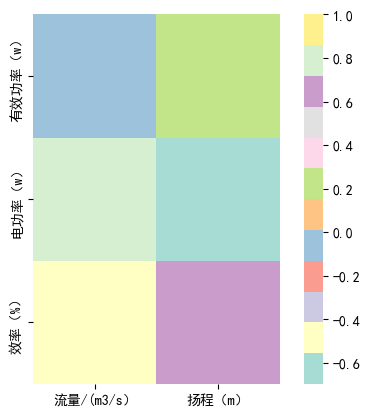

In [15]:
sns.heatmap(result, vmax=1, square=True, cmap=plt.get_cmap("Set3"),alpha=0.78,
                 )